In [1]:
import sys
import pandas as pd
import numpy as np
import difflib
import gzip
from scipy import stats
from statsmodels.stats import multicomp
import matplotlib.pyplot as plt


p-value for ANOVA test: 3.77876441976e-204
      Multiple Comparison of Means - Tukey HSD,FWER=0.05     
    group1         group2     meandiff  lower   upper  reject
-------------------------------------------------------------
    merge1     partition_sort -0.0838  -0.0891 -0.0785  True 
    merge1          qs1       -0.1164  -0.1217 -0.1111  True 
    merge1          qs2       -0.0351  -0.0404 -0.0298  True 
    merge1          qs3       -0.0385  -0.0438 -0.0332  True 
    merge1          qs4       -0.0526  -0.0579 -0.0473  True 
    merge1          qs5       -0.0479  -0.0532 -0.0426  True 
partition_sort      qs1       -0.0326  -0.0379 -0.0273  True 
partition_sort      qs2        0.0487   0.0434  0.054   True 
partition_sort      qs3        0.0453    0.04   0.0506  True 
partition_sort      qs4        0.0312   0.0259  0.0365  True 
partition_sort      qs5        0.0359   0.0306  0.0412  True 
     qs1            qs2        0.0813   0.076   0.0866  True 
     qs1            qs3    

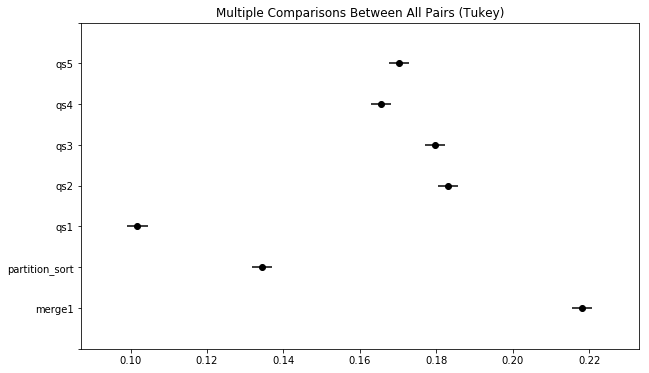

In [6]:
df = pd.read_table("data.csv",sep=',')
stats.normaltest(np.sqrt(df['qs1']))
df_sum = pd.DataFrame(columns =["name","normalTest_p"])
df_sum['name']=df.columns
df_sum["normalTest_p"] = df.apply(lambda x: stats.normaltest(x.values).pvalue).values

p_anova = stats.f_oneway(df["qs1"],df["qs2"],df["qs3"],df["qs4"],df["qs5"],df["merge1"],df["partition_sort"])
print("p-value for ANOVA test: "+str(p_anova.pvalue))
x_melt = pd.melt(df)
posthoc = multicomp.pairwise_tukeyhsd(x_melt['value'], x_melt['variable'], alpha=0.05)
print(posthoc)
print("""If we do a normal test on the data set""")
print(df_sum)
print("----------------------------------------------------------------")
print("""The data showes the distribution is sometimes not normal......Hmm...""")
print("""It could means that not conclusion can be drawn from ANOVA test since ANOVA test requires data in nomal distribution.""")
print("""But we will assume they are normal, by the nature of the test.""")
print("""From the scipy ANOVA website https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.f_oneway.html""")
print("""It hints that we could use Kruskal-Wallis H-test (which does not require data in normal distribution). Let's try it !""")
print("")

posthoc.plot_simultaneous()
plt.show()


In [3]:
p_kwh = stats.kruskal(df["qs1"],df["qs2"],df["qs3"],df["qs4"],df["qs5"],df["merge1"],df["partition_sort"])
print("p-value for Kruskal-Wallis H-test: "+str(p_kwh.pvalue))
print("since p-value is < 0.05, we could conclude that they have different means.")

p-value for Kruskal-Wallis H-test: 2.41537196544e-63
since p-value is < 0.05, we could conclude that they have different means.


In [4]:
def apply_CLT(data,sample_size,times):
    result=[]
    for i in range(times):
        samples = np.random.randint(0,len(data),sample_size)
        mean = np.mean([data[j] for j in samples])
        result.append(mean)
    return result

clt_values = df.apply(lambda x: stats.normaltest(apply_CLT(x.values,20,25)).pvalue).values
df_sum["CLTed_normalTest_p"] = clt_values
df_sum
# k =apply_CLT(df['qs4'],30,25)
# plt.plot(k,"r.")
# plt.hist(k)
# plt.show()
# stats.normaltest(k)

,name,normalTest_p,CLTed_normalTest_p
0,qs1,3.594489e-09,0.361344
1,qs2,1.779048e-14,0.996811
2,qs3,3.718075e-12,0.759101
3,qs4,7.521763e-09,0.021634
4,qs5,3.381959e-05,0.450076
5,merge1,6.375844e-15,0.180559
6,partition_sort,4.242822e-04,0.599461
